In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 10]

from sklearn.tree import DecisionTreeClassifier

import seaborn as sns
sns.set()

from telperion.Mallorn import Mallorn
from telperion.utils import plot_decision_domains, accuracy

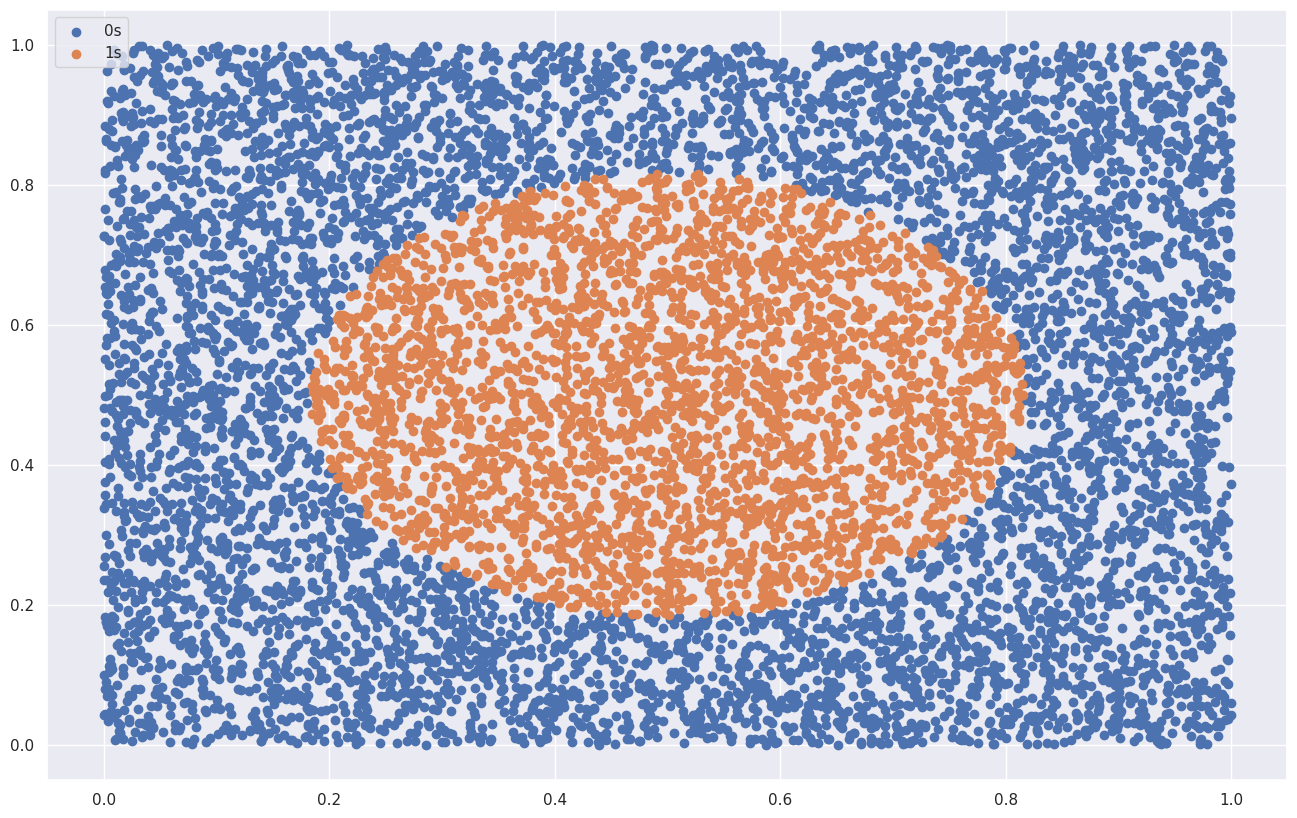

In [2]:
x = np.random.uniform(low=0, high=1, size=(10000,2))
y = np.array([1 if (j-0.5)**2 + (i-0.5)**2 < 0.1 else 0 for i, j in zip(x[:,0],x[:,1])])
# y = np.round(x[:,0])

plt.scatter(x[~y.astype(bool),0],x[~y.astype(bool),1], label='0s')
plt.scatter(x[y.astype(bool),0],x[y.astype(bool),1], label='1s')
plt.legend()

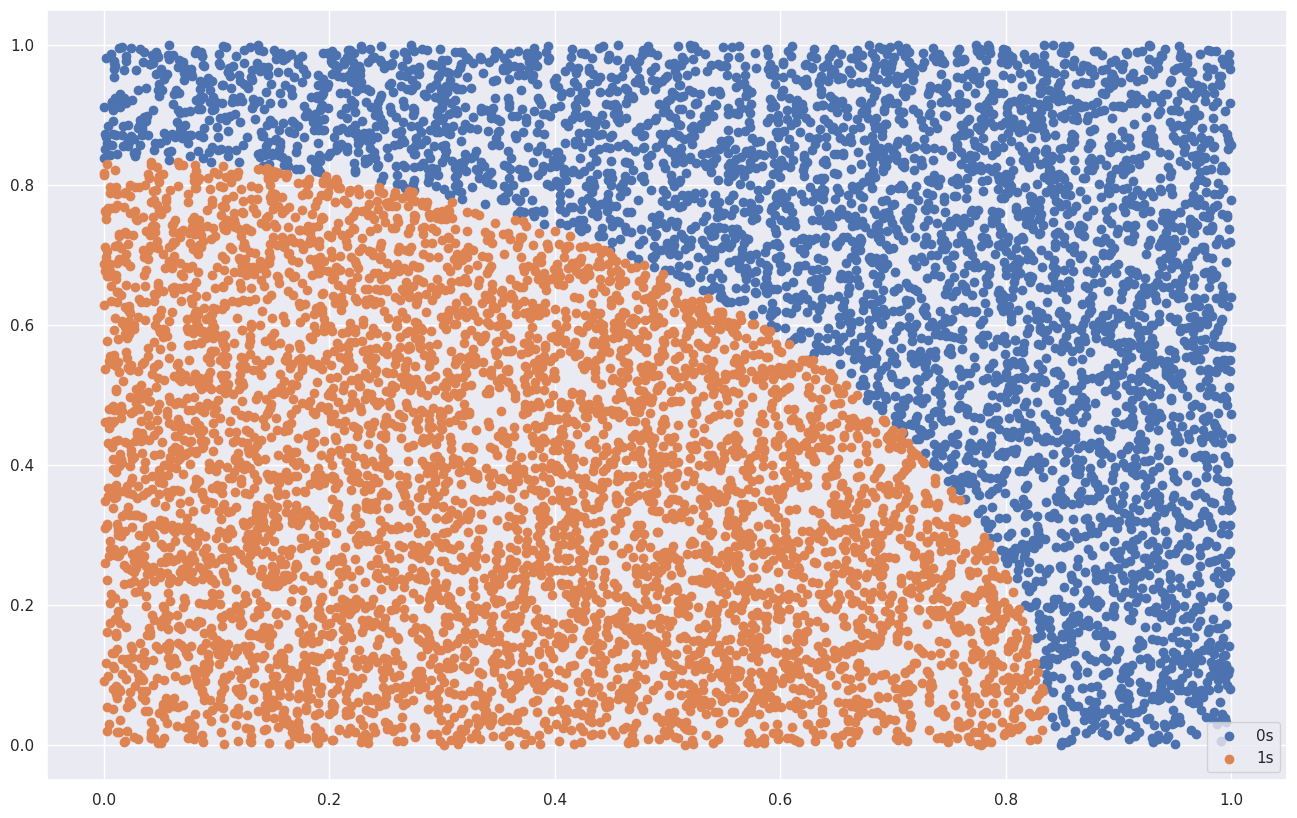

In [3]:
x = np.random.uniform(low=0, high=1, size=(10000,2))
y = np.array([1 if (j-0.5)**2 + (i-0.5)**2 < 0.1 else 0 for i, j in zip(x[:,0],x[:,1])])
y = np.array([1 if (j)**2 + (i)**2 < 0.7 else 0 for i, j in zip(x[:,0],x[:,1])])

plt.scatter(x[~y.astype(bool),0],x[~y.astype(bool),1], label='0s')
plt.scatter(x[y.astype(bool),0],x[y.astype(bool),1], label='1s')
plt.legend()

In [4]:
max_depth = 3

In [5]:
hw = Mallorn(max_depth=max_depth) # Basically, just HeartWood, wrapped to yield the correct decision value
hw.fit(x, y, lr=0.01, batch_size=128, epochs=100, metric='gini', method='both', backend='skorch', verbose=0)

# w_hw = hw.root.stump.fc.weight.data.squeeze().tolist()
# b_hw = hw.root.stump.fc.bias.data.tolist()[0]

# print()
# print("Feature w:\t{}".format(w_hw))
# print("Threshold:\t{}".format(b_hw))
# print("Multidim:\t{}".format(hw.root.stump.is_multidim()))

In [6]:
dt = DecisionTreeClassifier(max_depth=max_depth)
dt.fit(x,y)

w_dt = dt.tree_.feature[0]
b_dt = dt.tree_.threshold[0]

print("Feature idx:\t{}".format(w_dt))
print("Threshold:\t{}".format(b_dt))

Feature idx:	0
Threshold:	0.6778081059455872


Text(0.5, 1.0, 'Multi-Dim. DTs')

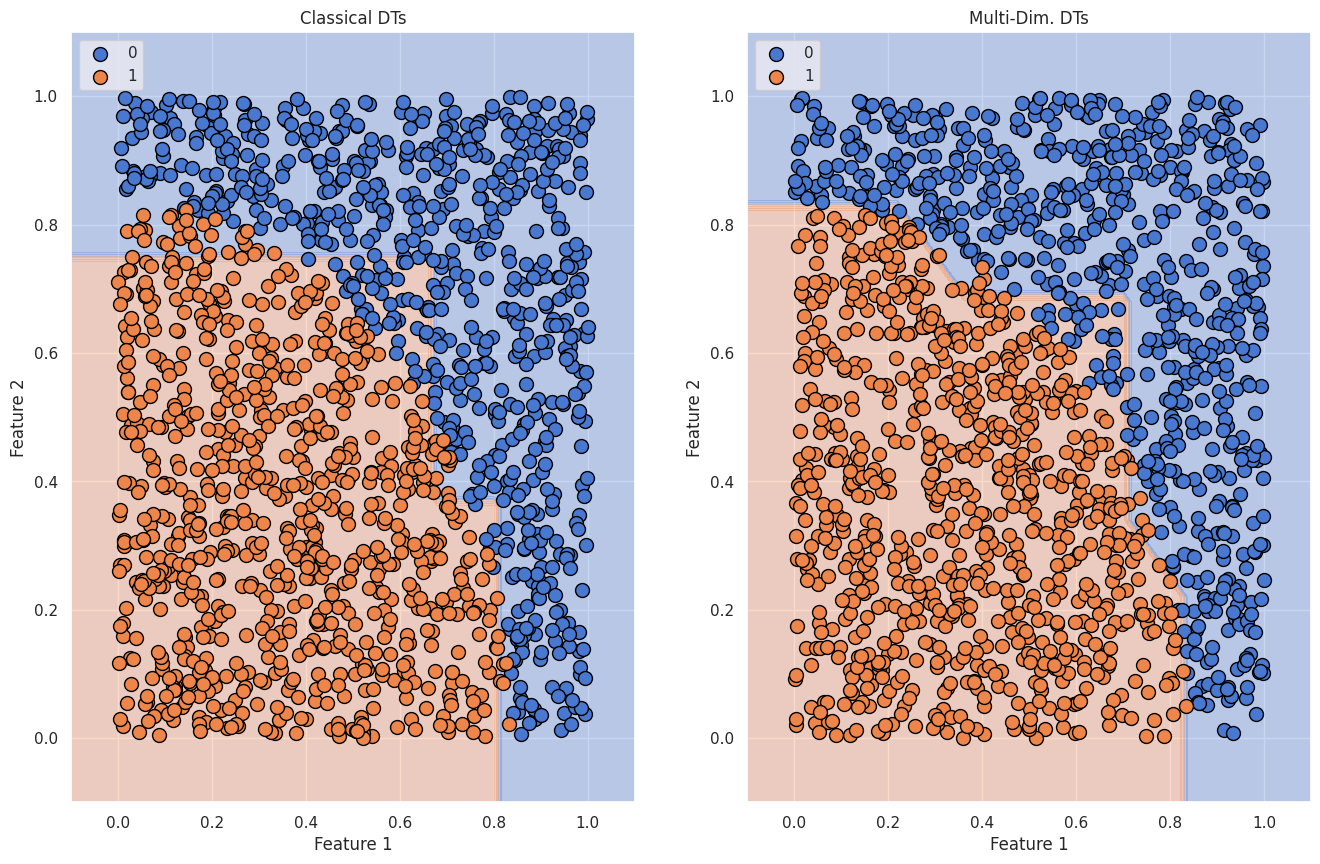

In [7]:
plt.subplot(121)
plot_decision_domains(x, y, dt, margin=0.1, subsample=0.15)
plt.title("Classical DTs")

plt.subplot(122)
plot_decision_domains(x, y, hw, margin=0.1, subsample=0.15)
plt.title("Multi-Dim. DTs")

In [8]:
import torch
print(accuracy(hw.predict(x), torch.tensor(y)))
print(accuracy(torch.tensor(dt.predict(x)), torch.tensor(y)))

tensor(96.1300)
tensor(93.7000)


In [9]:
hw.print_tree()

Root: Decision Stump ( [-13.74, -13.87] * X > -14.53 )
  Left:   Decision Stump ( [1.0, 0.0] * X > 0.72 )
    Left:   Decision Stump ( [0.0, 1.0] * X > 0.69 )
      Left:   Leaf => Class: 1.0
      Right:  Leaf => Class: 0.0
    Right:  Leaf => Class: 0.0
  Right:  Decision Stump ( [1.0, 0.0] * X > 0.83 )
    Left:   Decision Stump ( [0.0, 1.0] * X > 0.83 )
      Left:   Leaf => Class: 1.0
      Right:  Leaf => Class: 0.0
    Right:  Leaf => Class: 0.0
